# **Regression(overfit and regularization !)**

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
order = 50

In [99]:
X = np.array([ [1] , [3] , [7] , [9] , [13] , [17] , [24] , [27] ])
y = np.array( [1.5,   3,    6,   11,    14.5,  15,    15.5,  16] )


def prepar_data(X, order):
    X = np.c_[np.ones(len(X)), X]
    X[:,1] = X[:,1] / max(X[:,1])
    for i in range(2, order+1):
        X = np.c_[X, X[:,1]**i]
        X[:,i] = X[:,i] / max(X[:,i])
    return(X)

X = prepar_data(X, order)

Error: 6.578834089235232


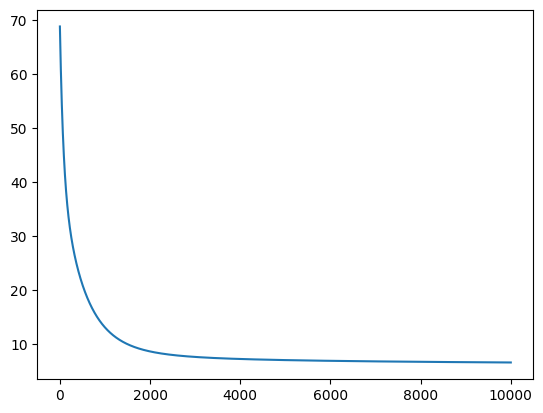

In [103]:
alpha = 1e-3
m = len(X)
w = np.zeros(len(X[0]))
cost = []
l = 1

for epoch in range(10000):
    y_hat = X.dot(w)
    grad = (1/m) * X.T.dot(y_hat - y) + (l/m * w)
    w -= alpha * grad

    J = (1/(2*m)) * ((y_hat - y)**2).sum() + (l/(2*m) * w.sum())
    cost.append(J)

plt.plot(cost)
print(f"Error: {J}")

In [101]:
def model_plot(w):
    data = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
    x = prepar_data(data, order)

    y_pr = x.dot(w)
    plt.plot(data, y_pr)

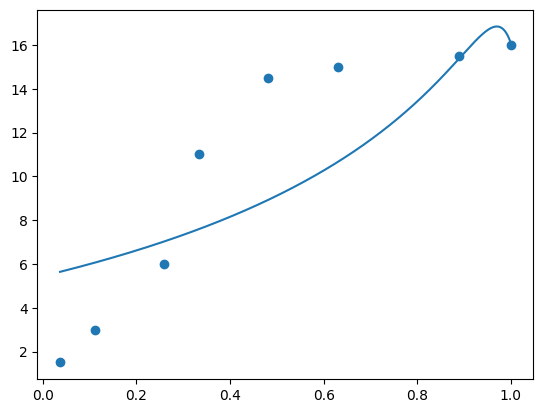

In [102]:
plt.scatter(X[:,1], y)
model_plot(w)